In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.linalg as linalg
from scipy.sparse.linalg import eigsh
from scipy.optimize import root_scalar

import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

In [2]:
n = 3000
p = 100
L = 50
mu_norm = 20

setting = "$n = {} \\quad p = {} \\quad L = {} \quad || \mu || = {}$".format(n, p, L, mu_norm)

# k = 2 # number of classes
# pi = np.array([0.5, 0.5]) # proportion of each class
# mu = stats.norm.rvs(size=(p, 1))
# M = np.concatenate([+mu, -mu], axis=1)

k = 3 # number of classes
pi = np.array([0.34, 0.33, 0.33]) # proportion of each class
M = stats.norm.rvs(size=(p, k))

M = mu_norm*M/np.linalg.norm(M, axis=0) # centroid of each class
J = utils.getJ(n, pi)
P = M@(J.T)
Z = stats.norm.rvs(size=(p, n))
X = P+Z

K = (X.T@X)/p
T = utils.gen_mask(n, L, kind='toeplitz')
K = K*T

dK = np.sum(K, axis=1)

i = 0

In [3]:
eigvals_t, eigvecs_t = linalg.eigh(K)

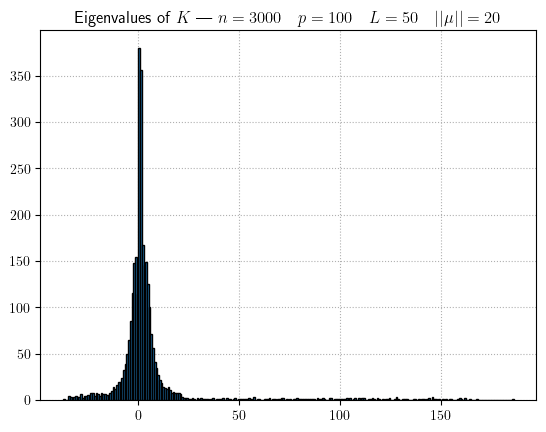

In [4]:
plt.hist(eigvals_t, bins='auto', edgecolor='black', zorder=3)
plt.grid(ls=':')
plt.title("Eigenvalues of $K$ | "+setting)
plt.show()

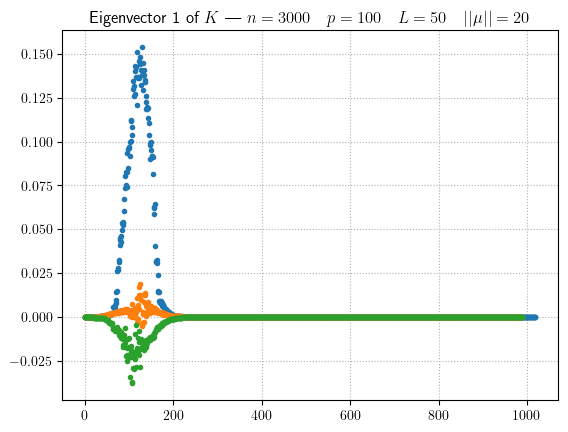

In [5]:
for j in range(k):
    plt.plot(eigvecs_t[(J[:, j] == 1), -i-1], ls='', marker='.')
plt.grid(ls=':')
plt.title("Eigenvector {} of $K$ | ".format(i+1)+setting)
plt.show()

In [6]:
H = lambda r: np.diag(r**2-1+dK)-r*K
def L_(t):
    d_tau = 1/np.sqrt(dK+t)
    return d_tau*K*d_tau[:, None]

func = lambda r: eigsh(H(r), k=i+1, which='SA', return_eigenvectors=False)[0]
r_optim = root_scalar(func, bracket=[1, 1000], x0=1)
print(r_optim)
r = r_optim.root

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 185.26069017522104


In [7]:
eigvals_h, eigvecs_h = linalg.eigh(H(r))
eigvals_l, eigvecs_l = linalg.eigh(L(r**2-1))

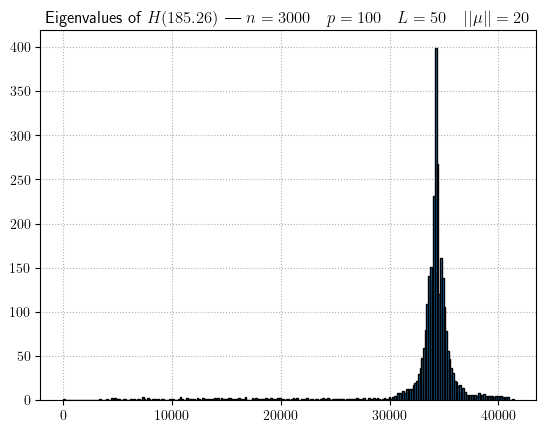

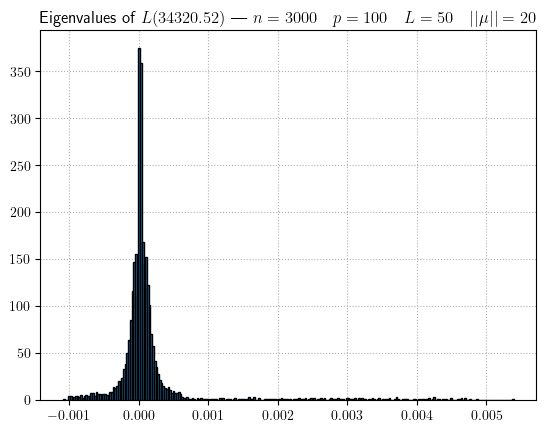

In [8]:
plt.hist(eigvals_h, bins='auto', edgecolor='black', zorder=3)
plt.grid(ls=':')
plt.title("Eigenvalues of $H({})$ | ".format(np.round(r, 2))+setting)
plt.show()

plt.hist(eigvals_l, bins='auto', edgecolor='black', zorder=3)
plt.grid(ls=':')
plt.title("Eigenvalues of $L({})$ | ".format(np.round(r**2-1, 2))+setting)
plt.show()

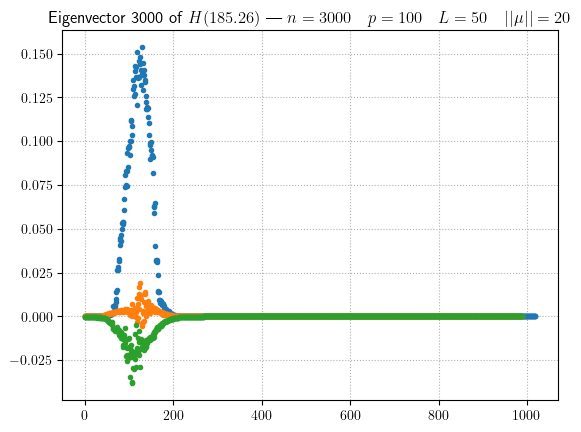

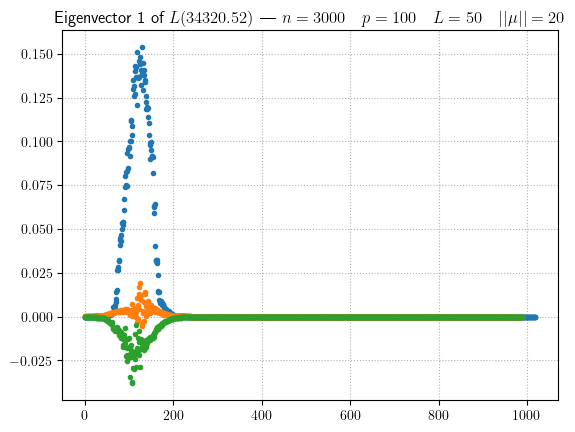

In [9]:
for j in range(k):
    plt.plot(eigvecs_h[(J[:, j] == 1), i], ls='', marker='.')
plt.grid(ls=':')
plt.title("Eigenvector {} of $H({})$ | ".format(n-i, np.round(r, 2))+setting)
plt.show()

for j in range(k):
    plt.plot(eigvecs_l[(J[:, j] == 1), -i-1], ls='', marker='.')
plt.grid(ls=':')
plt.title("Eigenvector {} of $L({})$ | ".format(i+1, np.round(r**2-1, 2))+setting)
plt.show()